In [1]:
from InstagramAPI import InstagramAPI

Fail to import moviepy. Need only for Video upload.


In [6]:
import getpass
login = getpass.getpass()
password = getpass.getpass()

········
········


In [7]:
api = InstagramAPI(login, password)
if (api.login()):
    api.getSelfUserFeed()  # get self user feed
    print(api.LastJson)  # print last response JSON
    print("Login succes!")
else:
    print("Can't login!")

Request return 405 error!
{u'status': u'fail', u'message': u''}
Request return 404 error!
Login success!

{u'auto_load_more_enabled': True, u'items': [{u'code': u'BwYX9mSnq7nQUYpcKojU9v0UDJUS1bXMJ5JTMA0', u'can_viewer_save': True, u'likers': [{u'username': u'jie_jun_w', u'profile_pic_url': u'https://instagram.fsin9-1.fna.fbcdn.net/vp/0984a60b9305d4a5daaa9ce1ed70eb12/5E1AE979/t51.2885-19/11007829_1381311285518377_468704559_a.jpg?_nc_ht=instagram.fsin9-1.fna.fbcdn.net', u'full_name': u'Junjie', u'pk': 204476169, u'is_verified': False, u'is_private': True}, {u'username': u'lingxian_chia', u'profile_pic_url': u'https://instagram.fsin9-1.fna.fbcdn.net/vp/137bfa4a65f0b05b06fbfde1496bb822/5E2A42C9/t51.2885-19/s150x150/45417244_1226899500795610_7037883632001744896_n.jpg?_nc_ht=instagram.fsin9-1.fna.fbcdn.net', u'profile_pic_id': u'1914298807408308117_2466498', u'full_name': u'Xian', u'pk': 2466498, u'is_verified': False, u'is_private': True}, {u'username': u'victoriahayy', u'profile_pic_url': 

Login succes!


In [10]:
import time
API = InstagramAPI(login,password)
API.login()
time.sleep(2)

Request return 429 error!
{u'status': u'fail', u'message': u'Please wait a few minutes before you try again.'}
Request return 405 error!
{u'status': u'fail', u'message': u''}
Request return 404 error!
Login success!



In [11]:
API.getProfileData()
API.LastJson.keys()


[u'status', u'user']

In [12]:
print API.LastJson['user'].keys()
my_id = API.LastJson['user']['pk']


[u'username', u'reel_auto_archive', u'has_anonymous_profile_picture', u'hd_profile_pic_versions', u'allowed_commenter_type', u'gender', u'show_conversion_edit_entry', u'phone_number', u'birthday', u'profile_pic_url', u'profile_pic_id', u'biography', u'full_name', u'can_link_entities_in_bio', u'pk', u'hd_profile_pic_url_info', u'is_verified', u'email', u'is_private', u'external_url']


In [13]:
API.getUsernameInfo(my_id)
n_media = API.LastJson['user']['media_count']

In [16]:
media_ids = []
max_id = ''
for i in range(n_media/18+1): 
    API.getUserFeed(usernameId=my_id, maxid = max_id)
    media_ids += API.LastJson['items'] 
    if API.LastJson['more_available']==False:
        print "no more avaliable"            
        break
    max_id = API.LastJson['next_max_id'] 
    print i, "   next media id = ", max_id, "  ", len(media_ids)
    time.sleep(3)

no more avaliable


In [17]:
likers = []
m_id = 0
print "wait %.1f minutes" % (n_media*2/60.)
for i in range(len(media_ids)):
    m_id = media_ids[i]['id']
    API.getMediaLikers(m_id)
    likers += [API.LastJson]
    time.sleep(2)
print "done!"

wait 0.1 minutes
done!


In [18]:
users = []
for i in likers:
        users += map(lambda x: i['users'][x]['username'],
                     range(len(i['users'])))
users_set = set(users)

print "all users = ", len(users), " uniqum users = ", len(users_set)

all users =  18  uniqum users =  12


In [19]:
l_dict = {}
for user in users_set:
   # l_dict structure - {username:number_of_liked_posts} 
   l_dict[user] = users.count(user)

In [21]:
!pip install matplotlib

DEPRECATION: Python 2.7 will reach the end of its life on January 1st, 2020. Please upgrade your Python as Python 2.7 won't be maintained after that date. A future version of pip will drop support for Python 2.7. More details about Python 2 support in pip, can be found at https://pip.pypa.io/en/latest/development/release-process/#python-2-support


In [22]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
import operator
all_pairs = sorted(l_dict.items(), key=operator.itemgetter(1))
n_users = 10 # top 10 users
pairs = all_pairs[-n_users:]
y = map(lambda y: pairs[y][1], range(len(pairs)))
x = map(lambda y: pairs[y][0], range(len(pairs)))

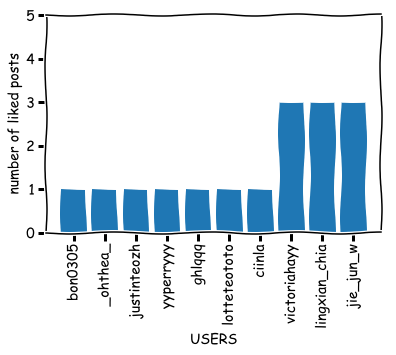

In [24]:
fig = plt.figure()
plt.xkcd()
plt.xticks(range(len(pairs)), x, rotation='vertical')
plt.ylim([0, 5])
plt.bar(range(len(pairs)), y)
plt.xlabel('USERS')
plt.ylabel('number of liked posts')
plt.show()

<Figure size 432x288 with 0 Axes>

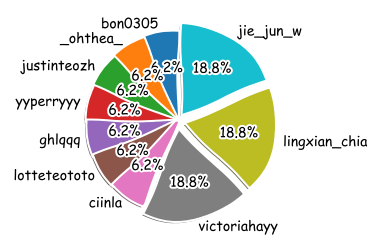

In [25]:
plt.gcf().clear()

explode = map(lambda i: i/max(y)/10., y)
fig1, ax1 = plt.subplots()
ax1.pie(y, explode=explode, 
        labels=x, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  
plt.show()

In [2]:
!pip install pandas

DEPRECATION: Python 2.7 will reach the end of its life on January 1st, 2020. Please upgrade your Python as Python 2.7 won't be maintained after that date. A future version of pip will drop support for Python 2.7. More details about Python 2 support in pip, can be found at https://pip.pypa.io/en/latest/development/release-process/#python-2-support


In [6]:
import pandas as pd
df = pd.DataFrame({"date:dates"})
df.groupby(df["date"].dt.hour).count().plot(kind="bar",title="Hour" )

KeyError: 'date'